# Data visualisation
 * %pip install matplotlib
 * pip install --upgrade pip

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pandera as pa
from pandera.typing import DataFrame, Series
import random
#%pip install matplotlib
#%pip install --upgrade pip

In [9]:
import pandas as pd
from datetime import datetime
from typing import List
import pandera as pa
from pandera.typing import DataFrame, Series

# Define the data structure with static type annotations
class Student:
    def __init__(self, roll_no: int, name: str, fathername: str, date_of_admission: datetime, fee: int, course: str):
        self.roll_no = roll_no
        self.name = name
        self.fathername = fathername
        self.date_of_admission = date_of_admission
        self.fee = fee
        self.course = course

# Create a list of students
students: List[Student] = [
    Student(1, "Alice", "John", datetime(2022, 1, 10), 1500, "Mathematics"),
    Student(2, "Bob", "Robert", datetime(2022, 2, 14), 2000, "Physics"),
    Student(3, "Charlie", "Michael", datetime(2022, 3, 18), 1500, "Chemistry"),
    Student(4, "David", "William", datetime(2022, 4, 22), 2500, "Mathematics"),
    Student(5, "Eva", "Richard", datetime(2022, 5, 26), 2000, "Computer Science"),
    Student(6, "Frank", "Joseph", datetime(2022, 6, 30), 1500, "Mathematics"),
    Student(7, "Grace", "Charles", datetime(2022, 7, 4), 2500, "Physics"),
    Student(8, "Hannah", "Thomas", datetime(2022, 8, 8), 2000, "Mathematics"),
    Student(9, "Ivan", "Christopher", datetime(2022, 9, 12), 1500, "Biology"),
    Student(10, "Jack", "Daniel", datetime(2022, 10, 16), 2500, "Computer Science")
]

# Convert the list of students to a DataFrame
student_df = pd.DataFrame([{
    "roll_no": student.roll_no,
    "name": student.name,
    "fathername": student.fathername,
    "course": student.course,
    "date_of_admission": student.date_of_admission,
    "fee": student.fee,
} for student in students])

# Define the schema using pandera

class StudentSchema(pa.SchemaModel):
    roll_no: Series[int] = pa.Field(ge=1)
    name: Series[str] = pa.Field()
    fathername: Series[str] = pa.Field()
    course: Series[str] = pa.Field()
    date_of_admission: Series[datetime] = pa.Field()
    fee: Series[int] = pa.Field(ge=0)

    class Config:
        coerce = True

# Validate the DataFrame
validated_student_df: DataFrame[StudentSchema] = StudentSchema.validate(student_df)

# Display the validated DataFrame
print(validated_student_df)


   roll_no     name   fathername            course date_of_admission   fee
0        1    Alice         John       Mathematics        2022-01-10  1500
1        2      Bob       Robert           Physics        2022-02-14  2000
2        3  Charlie      Michael         Chemistry        2022-03-18  1500
3        4    David      William       Mathematics        2022-04-22  2500
4        5      Eva      Richard  Computer Science        2022-05-26  2000
5        6    Frank       Joseph       Mathematics        2022-06-30  1500
6        7    Grace      Charles           Physics        2022-07-04  2500
7        8   Hannah       Thomas       Mathematics        2022-08-08  2000
8        9     Ivan  Christopher           Biology        2022-09-12  1500
9       10     Jack       Daniel  Computer Science        2022-10-16  2500


In [10]:
student_df

,roll_no,name,fathername,course,date_of_admission,fee
0,1,Alice,John,Mathematics,2022-01-10,1500
1,2,Bob,Robert,Physics,2022-02-14,2000
2,3,Charlie,Michael,Chemistry,2022-03-18,1500
3,4,David,William,Mathematics,2022-04-22,2500
4,5,Eva,Richard,Computer Science,2022-05-26,2000
5,6,Frank,Joseph,Mathematics,2022-06-30,1500
6,7,Grace,Charles,Physics,2022-07-04,2500
7,8,Hannah,Thomas,Mathematics,2022-08-08,2000
8,9,Ivan,Christopher,Biology,2022-09-12,1500
9,10,Jack,Daniel,Computer Science,2022-10-16,2500


In [11]:
student_df.course.value_counts()

course
Mathematics         4
Physics             2
Computer Science    2
Chemistry           1
Biology             1
Name: count, dtype: int64

<Axes: xlabel='course'>

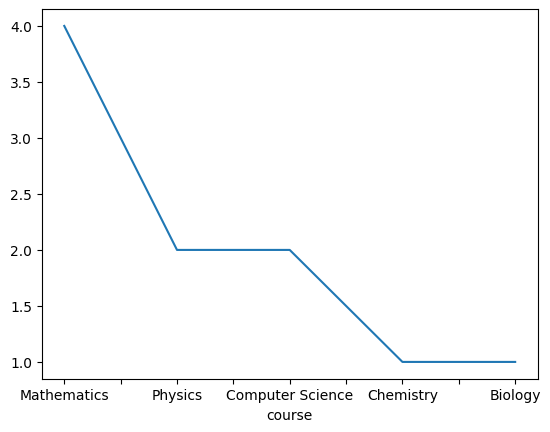

In [12]:
student_df.course.value_counts().plot()

<Axes: xlabel='course'>

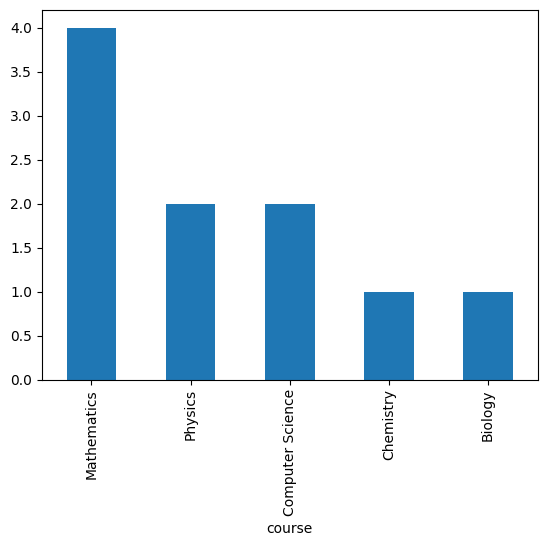

In [13]:
student_df.course.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

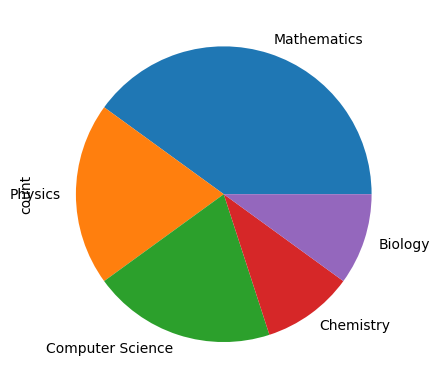

In [14]:
student_df.course.value_counts().plot(kind='pie')

<Axes: ylabel='proportion'>

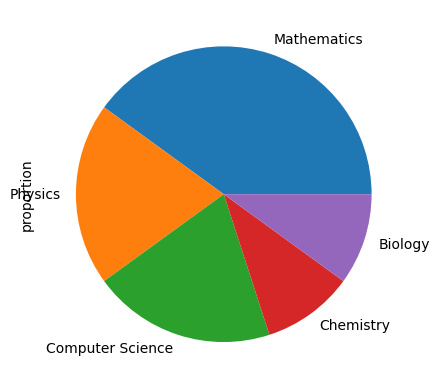

In [15]:
student_df.course.value_counts(normalize=True).plot(kind='pie')

C:\Users\ST\AppData\Local\Temp\ipykernel_6740\1825895543.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  student_df.groupby(['course'])['fee'].agg([min,max, np.mean]).plot(kind='bar')
C:\Users\ST\AppData\Local\Temp\ipykernel_6740\1825895543.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  student_df.groupby(['course'])['fee'].agg([min,max, np.mean]).plot(kind='bar')
C:\Users\ST\AppData\Local\Temp\ipykernel_6740\1825895543.py:1: FutureWarning: The provided callable <function mean at 0x000001D75875DE40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directl

<Axes: xlabel='course'>

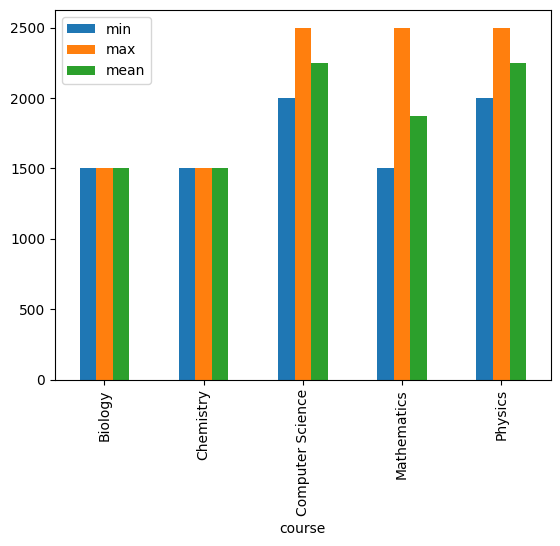

In [17]:
student_df.groupby(['course'])['fee'].agg([min,max, np.mean]).plot(kind='bar')